In [1]:
# 专注于 276240 和 276241 留仙大道的分析
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from chinese_calendar import is_workday, is_holiday
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

In [2]:
data_path = 'E:\\leitianjian\\Dataset\\competition\\traffic1\\'

In [3]:
tti = pd.read_csv(data_path + 'train_TTI.csv')
tti['time'] = pd.to_datetime(tti['time'])
tti['year'] = tti['time'].dt.year
tti['month'] = tti['time'].dt.month
tti['day'] = tti['time'].dt.day
tti['hour'] = tti['time'].dt.hour
tti['minute'] = tti['time'].dt.minute
tti.head()

,id_road,TTI,speed,time,year,month,day,hour,minute
0,276183,1.03472,69.6197,2019-01-01 00:00:00,2019,1,1,0,0
1,276183,1.03506,69.6275,2019-01-01 00:10:00,2019,1,1,0,10
2,276183,1.04166,69.1003,2019-01-01 00:20:00,2019,1,1,0,20
3,276183,1.02642,70.1266,2019-01-01 00:30:00,2019,1,1,0,30
4,276183,1.01442,70.9565,2019-01-01 00:40:00,2019,1,1,0,40


In [4]:
test_tti = pd.read_csv(data_path + 'toPredict_train_TTI.csv')
test_tti['time'] = pd.to_datetime(test_tti['time'])
test_tti.tail()

,id_road,TTI,speed,time
6043,276738,1.47263,27.9016,2020-01-01 20:10:00
6044,276738,1.47895,27.7825,2020-01-01 20:20:00
6045,276738,1.37184,29.9517,2020-01-01 20:30:00
6046,276738,1.41281,29.0830,2020-01-01 20:40:00
6047,276738,1.57808,26.0371,2020-01-01 20:50:00


In [5]:
pred_tti = pd.read_csv(data_path + 'toPredict_noLabel.csv')
pred_tti['time'] = pd.to_datetime(pred_tti['time'])
pred_tti['year'] = pred_tti['time'].dt.year
pred_tti['month'] = pred_tti['time'].dt.month
pred_tti['day'] = pred_tti['time'].dt.day
pred_tti['hour'] = pred_tti['time'].dt.hour
pred_tti['minute'] = pred_tti['time'].dt.minute
pred_tti.head()

,id_sample,id_road,time,year,month,day,hour,minute
0,0,276183,2019-12-21 08:30:00,2019,12,21,8,30
1,1,276183,2019-12-21 08:40:00,2019,12,21,8,40
2,2,276183,2019-12-21 08:50:00,2019,12,21,8,50
3,3,276183,2019-12-21 10:30:00,2019,12,21,10,30
4,4,276183,2019-12-21 10:40:00,2019,12,21,10,40


In [6]:
time_line = pd.DataFrame({'time': pd.date_range('20191001', '20191221', freq='10min')})
time_line['holiday'] = time_line['time'].apply(is_holiday)*1
time_line['year'] = time_line['time'].dt.year
time_line['month'] = time_line['time'].dt.month
time_line['day'] = time_line['time'].dt.day
time_line.head()

,time,holiday,year,month,day
0,2019-10-01 00:00:00,1,2019,10,1
1,2019-10-01 00:10:00,1,2019,10,1
2,2019-10-01 00:20:00,1,2019,10,1
3,2019-10-01 00:30:00,1,2019,10,1
4,2019-10-01 00:40:00,1,2019,10,1


In [26]:
tti_datetype = tti.groupby('id_road').apply(lambda x: pd.merge(x, time_line[['time', 'holiday']], how='inner'))
tti_datetype.drop('id_road', inplace=True, axis=1)
tti_datetype.reset_index('id_road', inplace=True)
tti_datetype = tti_datetype[(tti_datetype['id_road'] == 276240) | (tti_datetype['id_road'] == 276241)]
tti_datetype.head()

,id_road,TTI,speed,time,year,month,day,hour,minute,holiday
0,276240,1.15014,43.4365,2019-10-01 00:00:00,2019,10,1,0,0,1
1,276240,1.13064,44.1857,2019-10-01 00:10:00,2019,10,1,0,10,1
2,276240,1.13924,43.8522,2019-10-01 00:20:00,2019,10,1,0,20,1
3,276240,1.15113,43.3991,2019-10-01 00:30:00,2019,10,1,0,30,1
4,276240,1.13276,44.1029,2019-10-01 00:40:00,2019,10,1,0,40,1


In [67]:
# tti_HA = tti_datetype.groupby(['id_road', 'hour', 'minute', 'holiday'])[['TTI']].median()
# tti_HA.reset_index(inplace=True)
# tti_HA_workday = tti_HA[tti_HA['holiday']==0].drop('holiday', axis=1)
# tti_HA_holiday = tti_HA[tti_HA['holiday']==1].drop('holiday', axis=1)
# tti_HA_workday.head()
tti_HA_month = tti_datetype.groupby(['id_road', 'month', 'hour', 'minute', 'holiday'])[['TTI']].mean()
# tti_HA_month = tti_datetype.groupby(['id_road', 'month', 'hour', 'minute', 'holiday'])[['TTI']].median()
tti_HA_month.reset_index(inplace=True)
tti_workday = tti_HA_month[tti_HA_month['holiday'] == 0].drop(['holiday'], axis=1)
tti_holiday = tti_HA_month[tti_HA_month['holiday'] == 1].drop(['holiday'], axis=1)
tti_holiday.head()
tti_workday.groupby(['id_road', 'month']).count()

hour  minute  TTI
id_road month                   
276240  10      144     144  144
        11      144     144  144
        12      144     144  144
276241  10      144     144  144
        11      144     144  144
        12      144     144  144

144
144
144
144
144
144


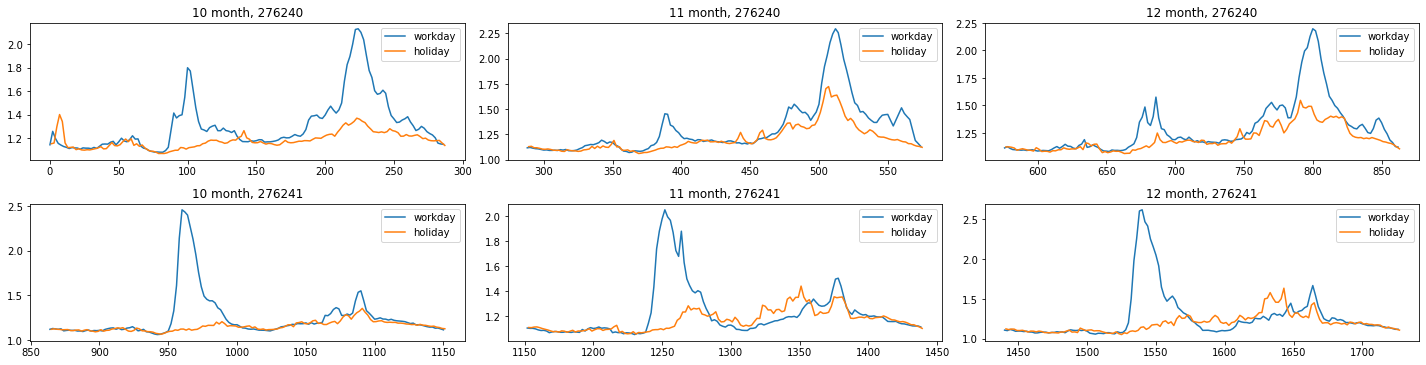

In [68]:
# plt.figure(figsize=(20, 15))
# for idx, id_road in enumerate(pd.unique([tti_workday['id_road'], tti_work]).unique()):
#     plt.subplot(6, 2, idx+1)
#     plt.plot(tti_HA_workday[tti_HA_workday['id_road']==id_road]['TTI'], label='workday')
#     plt.plot(tti_HA_holiday[tti_HA_holiday['id_road']==id_road]['TTI'], label='holiday')
#     plt.legend()
#     plt.title(id_road)
# plt.tight_layout()

plt.figure(figsize=(20, 15))
for idx, id_road_month in enumerate(pd.unique(list(zip(tti_workday.id_road, tti_workday.month)))):
    plt.subplot(6, 3, idx + 1)
    id_road, month = id_road_month
#     print(id_road, month)
    print(tti_workday[(tti_workday['id_road'] == id_road) & (tti_workday['month'] == month)]['TTI'].size)
    plt.plot(tti_workday[(tti_workday['id_road'] == id_road) & (tti_workday['month'] == month)]['TTI'], label='workday')
    plt.plot(tti_holiday[(tti_holiday['id_road'] == id_road) & (tti_holiday['month'] == month)]['TTI'], label='holiday')
    plt.legend()
    plt.title(str(month) + " month, " + str(id_road))
plt.tight_layout()